# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
import dask.dataframe as dd
import pingouin as pg
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
### Select Folder App - After you run, you can select your folder for filepath
button = widgets.Button(description = 'Select Folder') #<- creates a button variable
display(button) #<- displays the button in output

def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
    global folder_path #<- sets a variable as a global variable, not just within this action
    #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
    folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
    #Tk().update() #<- below
    #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
    print(folder_path) #<- this helps confirm that this action was performed
    print('done step 2')
button.on_click(select_folder)

Button(description='Select Folder', style=ButtonStyle())

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory



## 3.2: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [3]:
# Setting 1s Bins: for 0.5s Bins: 0,360,721
# bins = np.linspace(0,360,721) #<- np.linspace(start, end, steps in between)
# bins = np.linspace(0,420,841) #<- np.linspace(start, end, steps in between)
bins = np.linspace(0,420,421) # 1 second bins (smoother lines on graph)

print(bins)


print("done step 3")

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# 4. Construct filelist from folder path (No input required, just run)

In [4]:
#folder_path = '/Users/Joseph/Desktop/lrk1_ATR_NoATR_08_15_2019'
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

/Volumes/JosephBSR/Ben_BSR_all
['/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00389.dat', '/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00006.dat', '/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00134.dat', '/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00390.dat', '/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00135.dat', '/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00008.dat', '/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00009.dat', '/Volumes/JosephBSR/Ben_BSR_all/rskd-1(tm4031)_OffFood/20230213_112157/FX04031_6x2_n72h20C_420s_A0213_RN2.00393.dat', '/Volumes/JosephBSR/Ben_

# 5. Process Data Function (No input required, just run)

In [5]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in tqdm(enumerate(strain_filelist, start=1)): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        # statement = f"Processing {i} of {N} worms" #<- progress bar statement
        DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        if i==1:
            DF_Total = DF_Read
            DF_Total = DF_Total.dropna(axis=0)
            DF_Total["worm"]=i
#             DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
#             DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
#             pathlen_i = np.array(DF_Total.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Total.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Total["distance"]=resultS.cumsum()
            DF_Total=DF_Total.dropna()
#             print(DF_Total)
        else:
            DF_Add = DF_Read
            DF_Add = DF_Add.dropna(axis=0)
            DF_Add["worm"]=i
#             DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
#             DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
#             pathlen_i = np.array(DF_Add.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Add.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Add["distance"]=resultS.cumsum()
#             DF_Add = DF_Add.dropna()
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = True)  #<- imports and cleans data
        # print(statement)
#         print(DF_Total)
    DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area"
                }, axis=1)
#     print(DF_Total)

    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = pd.cut(DF_Total['time'], Bins, labels = Bins[1:])
    DF_Total['time_bin'] = DF_Total['time_bin'].astype(np.float64)
    DF_time_bin=DF_Total.groupby(["time_bin", "worm"], as_index=False).mean()
#     print(DF_time_bin)
    #     DF_Speed_DF = DF_Total[["time", "time_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_time_bin, #DF_Total if want to non-binned data
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

print('done step 5')

done step 5


# 6.1 Processing Data (Please Read, Input Here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

In the same example, if the identifier for your second strain is 'AVR14', then the N2 files will also be included, as this identifier can also be found in this file path.

## Depending on how many strains you are running for comparison, you may need to add/delete some lines.

You are not naming your data groups here, we have a step for that later.
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [13]:
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# print(list(set(filelist)))
# nfiles = list(range(1, len(filelist.unique())+1))
# print(nfiles)
# strainnames = []
strainnames=[]
for f in filelist:
    strainnames.append(f.split('/')[4])
ustrainnames=list(set(strainnames))
print(ustrainnames)
# print(ustrainnames)
ustrainnames.sort()
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OnFood")))
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OffFood")))
# print(ustrainnames)
nstrains=list(range(1,len(ustrainnames)+1))
# print(nstrains)

StrainNames = {}
StrainNames = {nstrains[i]: ustrainnames[i] for i in range(len(nstrains))}
print(StrainNames)
print("done step 6.1")

# <---------------- Test element to use for dictionary buidling -------------------
# s = '/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
# slist=s.split('/')[5]
# print(slist)
# print(list(range(1,5+1)))

['N2_OnFood', 'R07G3.8(tm5683)_OnFood', 'gba-2(tm4623)_OffFood', 'hipr-1(ok1081)_OffFood', 'set-2(ok1484)_OnFood', 'gba-4(tm3314)_OnFood', 'hipr-1(ok1081)_OnFood', 'R07G3.8(tm5683)_OffFood', 'rskd-1(tm4031)_OnFood', 'lfe-2(tm14109)_OffFood', 'gba-2(tm4623)_OnFood', 'sac-2(ok2743)_OffFood', 'set-2(ok1484)_OffFood', 'N2_OffFood', 'igcm-2(ok1527)_OnFood', 'sac-2(ok2743)_OnFood', 'gba-4(tm3314)_OffFood', 'igcm-2(ok1527)_OffFood', 'lfe-2(tm14109)_OnFood', 'rskd-1(tm4031)_OffFood', 'cat-2(e1112)_OffFood', 'cat-2(e1112)_OnFood']
{1: 'N2_OffFood', 2: 'N2_OnFood', 3: 'R07G3.8(tm5683)_OffFood', 4: 'R07G3.8(tm5683)_OnFood', 5: 'cat-2(e1112)_OffFood', 6: 'cat-2(e1112)_OnFood', 7: 'gba-2(tm4623)_OffFood', 8: 'gba-2(tm4623)_OnFood', 9: 'gba-4(tm3314)_OffFood', 10: 'gba-4(tm3314)_OnFood', 11: 'hipr-1(ok1081)_OffFood', 12: 'hipr-1(ok1081)_OnFood', 13: 'igcm-2(ok1527)_OffFood', 14: 'igcm-2(ok1527)_OnFood', 15: 'lfe-2(tm14109)_OffFood', 16: 'lfe-2(tm14109)_OnFood', 17: 'rskd-1(tm4031)_OffFood', 18: 'rsk

In [14]:
# # ------------This Cell Is Now Defunct ----------------


# #Format: Strain_# = 'unique_identifier'

# ### Make into dictionary
# StrainNames = {
#     'Strain_1' : 'No_Parafilm',   #<- each strain will be designated to a unique identifier here
#     'Strain_2' : 'Yes_Parafilm',
# #     'Strain_3' : 'e1112_OffFood',
# #     'Strain_4' : 'e1112_OnFood',
# #     'Strain_5' : 'Test_OffFood',
# #     'Strain_6' : 'Test_OnFood',
# #     'Strain_5' : 'N2_NoFood',
# #     'Strain_6' : 'N2_Food',
# #     'Strain_9' : 'LX636_NoFood',  #<- empty entries are for those hardcore trackers that tracking this many strains
# #     'Strain_10' : 'LX636_Food',
# #     'Strain_11' : '',
# #     'Strain_12' : '',
# #     'Strain_13' : '',
# #     'Strain_14' : '',
# #     'Strain_15' : '',
# }
# #...etc, etc

# print('done step 6.1')
# print(StrainNames)

# Cell below is to run testing/debugging. Do not need to run (commented out)

In [15]:


# DF_Read = pd.read_csv('/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
#                       , sep=' ', header = None, index_col=False) #<- imports and cleans data
# DF_Read["worm"]=1
# # print(DF_Read)
# DF_Total = DF_Read #<- more data cleaning
# DF_Total = DF_Total.rename( #<- more data cleaning
#             {0:'time',
#             1:'speed',
#             2: "x",
#             3: "y",
#             4: "angularspeed",
#             5: "pathlength",
#             6: "kink",
#             7: "bias",
#             8: "curve",
#             9: "dir",
#             10: "crab",
#             11: "length",
#             12: "midline",
#             13: "width",
#             14: "morphwidth",
#             15: "area"
#             }, axis=1)
# DF_Total["x_0"] = DF_Total.x - DF_Total.x.iloc[0]
# DF_Total["y_0"] = DF_Total.y - DF_Total.y.iloc[0]

# DF_Total["x_test"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
# DF_Total["y_test"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
# DF_Total["distance"]= 0
# print(DF_Total)

# A_i = np.array(DF_Total['pathlength'][1:])
# A_i_1 = np.array(DF_Total['pathlength'][0:-1])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# DF_Total["distance"]=new_list
# print(DF_Total)



        


# A_i = np.array(DF_Total.iloc[1:,5])
# A_i_1 = np.array(DF_Total.iloc[0:-1,5])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# print(A_i)
# print(A_i_1)
# print(len(A_i))
# print(len(A_i_1))
# # resultS=pd.Series(result)
# # print(resultS.cumsum())
# # print(new_list)

# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
    
    
# import matplotlib.pyplot as plt
# plt.plot(new_list)

# 6.2 Process Data (just run this cell)

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in tqdm(StrainNames.values()): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Confirm']) #<- appends all data into a list of dataframes
# print(DataLists[2])
print('done step 6.2')

  0%|          | 0/22 [00:00<?, ?it/s]

This Strain has 3109 worms tracked


0it [00:00, ?it/s]

This Strain has 2371 worms tracked


0it [00:00, ?it/s]

This Strain has 676 worms tracked


0it [00:00, ?it/s]

This Strain has 446 worms tracked


0it [00:00, ?it/s]

This Strain has 1288 worms tracked


0it [00:00, ?it/s]

This Strain has 1584 worms tracked


0it [00:00, ?it/s]

This Strain has 990 worms tracked


0it [00:00, ?it/s]

This Strain has 703 worms tracked


0it [00:00, ?it/s]

This Strain has 219 worms tracked


0it [00:00, ?it/s]

This Strain has 148 worms tracked


0it [00:00, ?it/s]

This Strain has 314 worms tracked


0it [00:00, ?it/s]

This Strain has 89 worms tracked


0it [00:00, ?it/s]

This Strain has 771 worms tracked


0it [00:00, ?it/s]

This Strain has 422 worms tracked


0it [00:00, ?it/s]

This Strain has 625 worms tracked


0it [00:00, ?it/s]

This Strain has 303 worms tracked


0it [00:00, ?it/s]

This Strain has 154 worms tracked


0it [00:00, ?it/s]

This Strain has 77 worms tracked


0it [00:00, ?it/s]

This Strain has 198 worms tracked


0it [00:00, ?it/s]

This Strain has 111 worms tracked


0it [00:00, ?it/s]

This Strain has 88 worms tracked


0it [00:00, ?it/s]

This Strain has 109 worms tracked


0it [00:00, ?it/s]

done step 6.2


# Convert float64 data to float32 to reduce memory load (can also convert to 16 if needed)

For plain english:

float16 = 4 decimal points

float32 = 8 decimal points

float64 = 16 decimal points

more decimal points = more data/memory that computer has to keep track of

In [19]:
#No need to run here
for n in tqdm(DataLists[1:]):
#     print(n)
    TestData=n
    TestData[TestData.select_dtypes(np.float64).columns] = TestData.select_dtypes(np.float64).astype(np.float16)
    print("done this strain")

  0%|          | 0/22 [00:00<?, ?it/s]

done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain
done this strain


In [20]:
#No need to run here

# print(TotalConcatenated.dtypes)
TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# print(TotalConcatenated.dtypes)
# TotalConcatenated.dtypes
# Test Cell
# DataLists[1].to_csv("test.csv")
Test = TotalConcatenated.reset_index(drop=True)
print(Test)

NameError: name 'TotalConcatenated' is not defined

# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [21]:
TotalConcatenated=pd.concat(df.assign(Strain=StrainNames.get(i+1)) for i,df in enumerate(DataLists[1:]))
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split('_', 1, expand=True)
# TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated = TotalConcatenated.reset_index(drop=True)
print(TotalConcatenated)
TotalConcatenated.to_csv("baseline_output.csv")
# print("done output")
print('done step 7')

       time_bin  worm        time     speed          x          y  \
0           4.0   166    3.958984  0.187744  24.453125  24.125000   
1           4.0   242    3.714844  0.214478  31.421875  36.218750   
2           4.0   243    3.802734  0.302979  31.265625  37.906250   
3           4.0   370    3.785156  0.227905  21.312500  28.890625   
4           4.0   462    3.863281  0.237549  21.343750  34.937500   
...         ...   ...         ...       ...        ...        ...   
20173     420.0   102  419.500000  0.017471  39.312500  26.640625   
20174     420.0   105  419.500000  0.014076  14.804688  30.468750   
20175     420.0   106  419.500000  0.007717  14.914062  35.843750   
20176     420.0   107  419.500000  0.030334  34.843750  15.820312   
20177     420.0   108  419.500000  0.022919  21.890625  43.250000   

       angularspeed  pathlength      kink      bias      curve  dir      crab  \
0          9.703125    0.024002  49.31250  1.000000  33.812500  0.0  0.004200   
1        

In [ ]:
# # <------------------- This cell is now DEFUNCT -----------------------


# #to add a line, add a comma to the last line and press 'enter' to type into a new line


# TotalConcatenated = pd.concat([DataLists[1].assign(Strain = "Wildtype - No Food"),
#                                DataLists[2].assign(Strain = "Wildtype - Food"),
#                                DataLists[3].assign(Strain = "Test - No Food"),
#                                DataLists[4].assign(Strain = "Test - Food"),
#                                DataLists[5].assign(Strain = "cat-2 (e1112) - No Food"),
#                                DataLists[6].assign(Strain = "cat-2 (e1112) - Food"),
# #                                DataLists[5].assign(Strain = "Wildtype - No Food"),
# #                                DataLists[6].assign(Strain = "Wildtype - Food"),
# #                                DataLists[9].assign(Strain = "dop-1 (vs101) - No Food"),
# #                                DataLists[10].assign(Strain = "dop-1 (vs101) - Food")
#                               ])
# # TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated = TotalConcatenated.reset_index(drop=True)
# print(TotalConcatenated)
# TotalConcatenated.to_csv("output.csv")
# # print("done output")
# print('done step 7')

# ..... TO Here

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

Palette:

Wildtype (ce314): (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

lrk-1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

vps-35 (hu68): (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

vps-35 (ok1880): (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)

cat-2 (e1112): #8B008B

cat-2 (e1112) No ATR: #FF00FF

ce314 without ATR: #20B2AA (light see green)

ok530 with ATR: #8B4513 (saddle brown)

ok530 without ATR: #D2691E (chocolate)

control + ATR: "black"

control - ATR: "gray"

lrk-1_1 + ATR: "navy"

lrk-1_1 - ATR: "royalblue"

lrk-1_2 + ATR: "green"

lrk-1_2 - ATR: "lightgreen"

# 8.2 Speed Trace Plot

In [ ]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = TotalConcatenated,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        '#FF00FF',
                        '#8B008B',
                        'green',
                        'lightgreen',
                        'royalblue',
                        'lightblue',
#                         '#FFB5C5',
#                         '#CD6889'
                       ])
plt.xlabel("Time (s)")
# plt.ylabel("Speed (mm/s)")
# plt.title("Speed Trace")
# plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
# plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450)
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [22]:
start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")

speed_diff = avg_speed.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'].unique())
speed_diff.reset_index(drop=True)
# print(speed_diff)
# print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

           Genotype     speed     Score
4      cat-2(e1112)  0.026952 -0.060597
16   rskd-1(tm4031)  0.046121 -0.041428
18    sac-2(ok2743)  0.059842 -0.027706
20    set-2(ok1484)  0.066314 -0.021235
12   igcm-2(ok1527)  0.067801 -0.019748
8     gba-4(tm3314)  0.076095 -0.011454
14   lfe-2(tm14109)  0.078571 -0.008978
0                N2  0.084881 -0.002668
2   R07G3.8(tm5683)  0.087549  0.000000
10   hipr-1(ok1081)  0.097154  0.009605
6     gba-2(tm4623)  0.098493  0.010944


In [23]:
print(speed_diff.iloc[0,1])

0.02695176


In [24]:
avg_speed["new"] = range(1,len(avg_speed)+1)
avg_speed.loc[avg_speed.index==4, 'new'] = 0
avg_speed.loc[avg_speed.index==4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

                     Strain Treatment         Genotype     speed  new
0                N2_OffFood   OffFood               N2  0.184379    1
1                 N2_OnFood    OnFood               N2  0.099498    2
2   R07G3.8(tm5683)_OffFood   OffFood  R07G3.8(tm5683)  0.162168    3
3    R07G3.8(tm5683)_OnFood    OnFood  R07G3.8(tm5683)  0.074619    4
4      cat-2(e1112)_OffFood   OffFood     cat-2(e1112)  0.206655    0
5       cat-2(e1112)_OnFood    OnFood     cat-2(e1112)  0.179703    6
6     gba-2(tm4623)_OffFood   OffFood    gba-2(tm4623)  0.165795    7
7      gba-2(tm4623)_OnFood    OnFood    gba-2(tm4623)  0.067302    8
8     gba-4(tm3314)_OffFood   OffFood    gba-4(tm3314)  0.134118    9
9      gba-4(tm3314)_OnFood    OnFood    gba-4(tm3314)  0.058024   10
10   hipr-1(ok1081)_OffFood   OffFood   hipr-1(ok1081)  0.183673   11
11    hipr-1(ok1081)_OnFood    OnFood   hipr-1(ok1081)  0.086518   12
12   igcm-2(ok1527)_OffFood   OffFood   igcm-2(ok1527)  0.169181   13
13    igcm-2(ok1527)

## Making the bar plot

<Figure size 432x288 with 0 Axes>

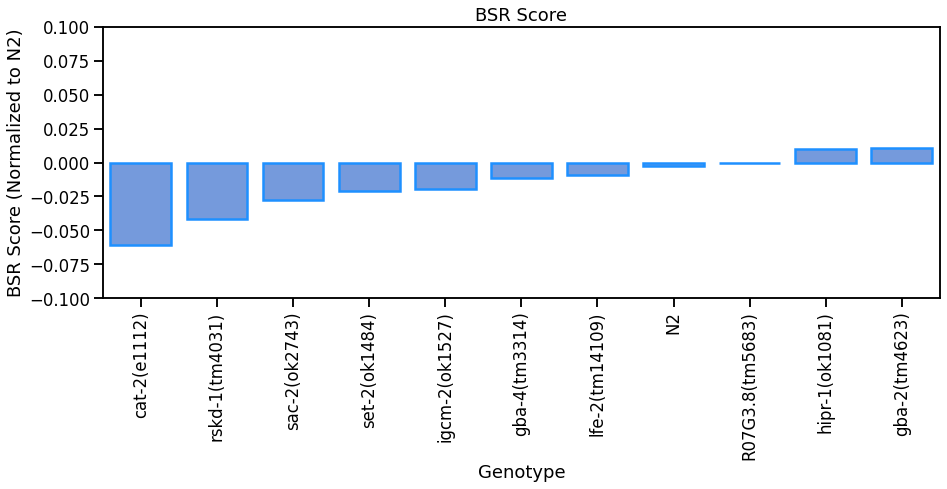

In [25]:
Title = "BSR Score" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'Score', 
             data = speed_diff, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor="DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.1)
plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [26]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 200
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

ValueError: Columns must be same length as key

In [27]:
# Test Cell
# chunkeddata_mean

In [28]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

ValueError: Could not interpret input 'Genotype'

<Figure size 432x288 with 0 Axes>

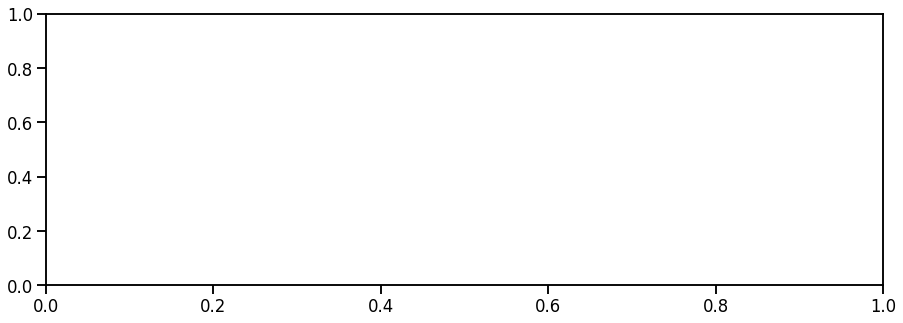

In [29]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst) - *Not Functional In Current Iteration

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace - *Not Functional In Current Iteration

In [ ]:
start=50
timepoint=420 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!

In [ ]:
AfterOneHundredSecs = TotalConcatenated[TotalConcatenated["time_bin"] >= 100].reset_index(drop=True)
print(AfterOneHundredSecs)

In [ ]:
AfterOneHundredMean = AfterOneHundredSecs.groupby(["Strain", "worm", "Genotype", "Treatment"], as_index=False).mean()
print(AfterOneHundredMean)

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----


var = "speed"

Title = f"{var}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = AfterOneHundredMean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
AfterOneHundredCAT = AfterOneHundredMean[AfterOneHundredMean.Genotype != "Test"]
AfterOneHundredTEST = AfterOneHundredMean[AfterOneHundredMean.Genotype != "cat-2 (e1112)"]


In [ ]:
print(AfterOneHundredMean)
print(AfterOneHundredCAT)
print(AfterOneHundredTEST)

In [ ]:
AfterOneHundredCAT.anova(dv="speed", between=["Genotype","Treatment"])

In [ ]:
AfterOneHundredTEST.anova(dv="speed", between=["Genotype","Treatment"]).round(7)